In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from astroML.correlation import two_point, bootstrap_two_point

from astropy.table import Table

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

## The (Exo)Planets

In [35]:
# from exoplanetarchive.ipac.caltech.edu
Efile = 'planets_2019.04.22_15.27.57.csv'

df = pd.read_csv(Efile, comment='#')
df.columns

Index(['pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod',
       'pl_controvflag', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1',
       'pl_orbinclerr2', 'pl_orbincllim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_dens', 'pl_denserr1',
       'pl_denserr2', 'pl_denslim', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag',
       'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_disterr1',
       'st_disterr2', 'st_distlim', 'st_optmag', 'st_optmagerr',
       'st_optmaglim', 'st_optband', 'gaia_gmag', 'gaia_gmagerr',
       'gaia_gmaglim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
       'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st

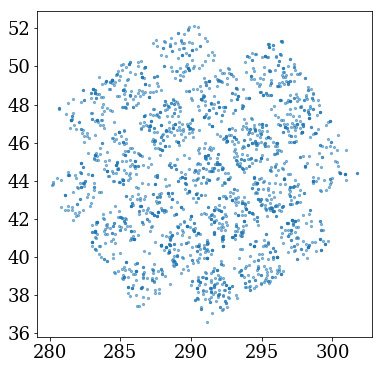

In [71]:
Kok = np.where((df['ra'] > 200) & (df['dec'] > 20))[0]

plt.figure(figsize=(6,6))
plt.scatter(df['ra'][Kok], df['dec'][Kok], s=5, alpha=0.5)

## The (Kepler) Field

In [42]:
tbl = Table.read('kepler_dr2_1arcsec.fits', format='fits')

df2 = tbl.to_pandas()
df2.columns

/Users/james/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'r_result_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/james/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'r_modality_flag' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/james/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'teff_err1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/james/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'teff_err2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['solution_id', 'designation', 'source_id', 'random_index',
       'gaia_ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       ...
       'mass_err2', 'prov_sec', 'nconfp', 'nkoi', 'ntce', 'jmag', 'hmag',
       'kmag', 'planet?', 'kepler_gaia_ang_dist'],
      dtype='object', length=134)

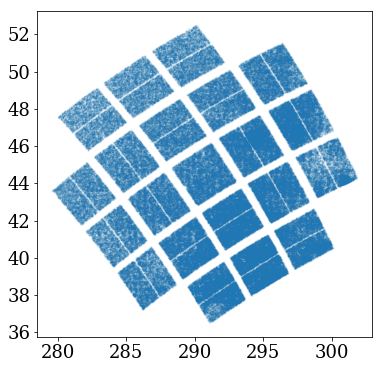

In [72]:
plt.figure(figsize=(6,6))
plt.scatter(df2['ra'].values, df2['dec'].values, s=1,alpha=0.1)

## 2 Point Correlation

In [73]:
Xk = np.vstack((df['ra'].values[Kok], df['dec'].values[Kok])).T
Xf = np.vstack((df2['ra'].values, df2['dec'].values)).T

print(Xk.shape, Xf.shape)

(2324, 2) (201312, 2)


In [74]:
Xf.shape

(201312, 2)

In [75]:
Xf[np.random.randint(0, high=Xf.shape[0], size=10000),:].shape

(10000, 2)

In [78]:
bins2pt = np.linspace(0.02, 5, 50)
# bins2pt = np.logspace(-1, 0.3, 50)

tptk = two_point(Xk, bins2pt)

# do a subset first to test...
tptf_sm = two_point(Xf[np.random.randint(0, high=Xf.shape[0], size=10000),:], bins2pt)

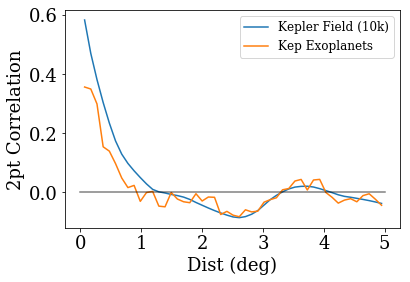

In [79]:
plt.plot(0.5*(bins2pt[1:]+bins2pt[0:-1]), tptf, label='Kepler Field (10k)')
plt.plot(0.5*(bins2pt[1:]+bins2pt[0:-1]), tptk, label='Kep Exoplanets')
plt.plot([0,max(bins2pt)], [0,0], c='k', alpha=0.5)

plt.xlabel('Dist (deg)')
plt.ylabel('2pt Correlation')
plt.legend(fontsize=12)

In [26]:
tptf = two_point(Xf, bins2pt) # the full sample... v. expensive to run apparently!

In [80]:
corrk, cerrk = bootstrap_two_point(Xk, bins2pt, Nbootstrap=500)

# do subsample again for field...
# corrf, cerrf = bootstrap_two_point(Xf[np.random.randint(0, high=Xf.shape[0], size=10000),:], bins2pt, Nbootstrap=5) 

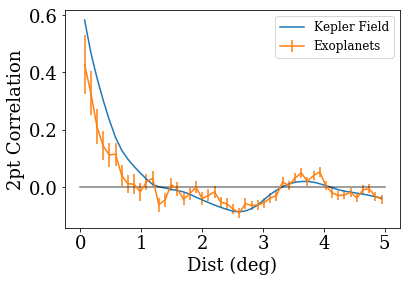

In [81]:
# plt.plot(0.5*(bins2pt[1:]+bins2pt[0:-1]), tptf_sm, label='Kepler Field (10k)')
# plt.errorbar(0.5*(bins2pt[1:]+bins2pt[0:-1]), corrf, yerr=cerrf, label='Kepler Field (10k boot)')
plt.plot(0.5*(bins2pt[1:]+bins2pt[0:-1]), tptf, label='Kepler Field')

plt.errorbar(0.5*(bins2pt[1:]+bins2pt[0:-1]), corrk, yerr=cerrk, label='Exoplanets')
plt.plot([0,max(bins2pt)], [0,0], c='k', alpha=0.5)

plt.xlabel('Dist (deg)')
plt.ylabel('2pt Correlation')
plt.legend(fontsize=12)

plt.savefig('../figures/2ptcf.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)